# **Assignment 4**

**Text and sequence**

In [ ]:
from keras.layers import Embedding
# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from google.colab import files
import re, os
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

**Model 1 From Scratch**

In [ ]:
# Number of words to consider as features
max_features = 10000
# Cut texts after 150 words
maxlen = 150
# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
#preprocessing.sequence.pad_sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()

# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs

model.add(Embedding(10000, 8, input_length=maxlen))

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))

#compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history_1 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 26s 39ms/step - loss: 0.5974 - acc: 0.6938 - val_loss: 0.4211 - val_acc: 0.8302
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.3316 - acc: 0.8662 - val_loss: 0.3201 - val_acc: 0.8672
Epoch 3/10
625/6

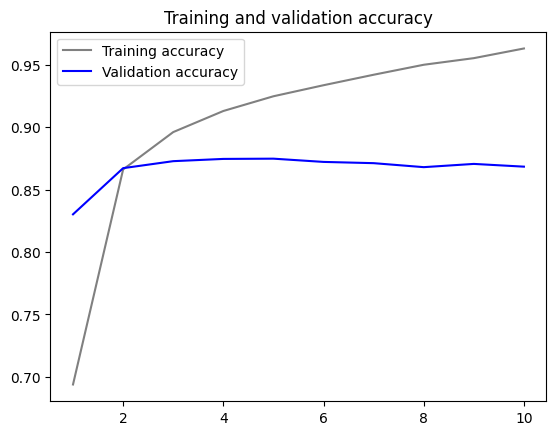

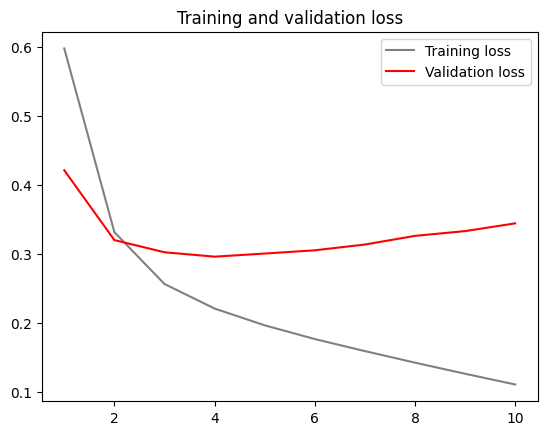

In [ ]:
import matplotlib.pyplot as plt

accuracy = history_1.history['acc']
val_accuracy = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.3465 - acc: 0.8658
Test loss: 0.34654125571250916
Test accuracy: 0.8657600283622742


**Model 2 Training - 100 samples**

In [ ]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:100]
y_train = y_train[:100]

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_2 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 2s 440ms/step - loss: 0.6980 - acc: 0.4000 - val_loss: 0.6863 - val_acc: 0.6000
Epoch 2/10
3/3 [==============================] - 1s 243ms/step - loss: 0.6734 - acc: 0.8125 - val_loss: 0.6858 - val_acc: 0.6000
Epoch 3/10
3/3 [====

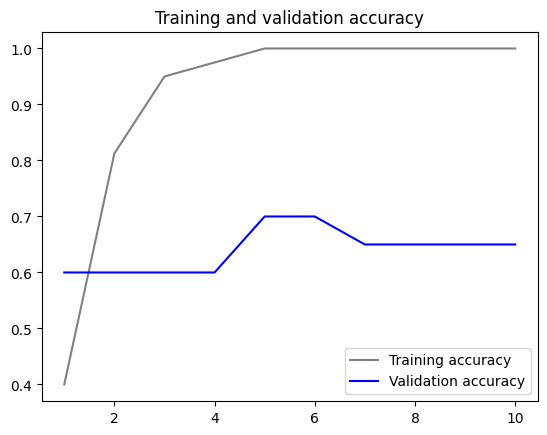

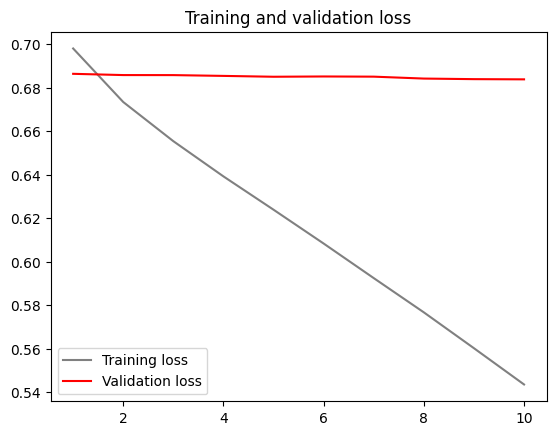

In [ ]:
accuracy = history_2.history['acc']
val_accuracy = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 3ms/step - loss: 0.6944 - acc: 0.4938
Test loss: 0.6943621039390564
Test accuracy: 0.49375998973846436


# **Using Pre-Trained word embeddings**

**Download the IMDB data as raw text**

**Model 3 Pre-Trained model, Training- 100 samples**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import os

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  7175k      0  0:00:11  0:00:11 --:--:-- 14.3M


In [ ]:
imdb_dir = '/content/drive/MyDrive/aclImdb'

In [ ]:
train_dir = os.path.join(imdb_dir, 'train')

In [ ]:
labels = []
texts = []

In [ ]:
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

**Tokenizing the data**

In [ ]:
maxlen = 150  # We will cut reviews after 100 words
training_samples = 100 # We will be training on 100 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


**Download the GloVe word embeddings**

**Pre-Processing the embeddings**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import os
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to the GloVe embeddings file in your Google Drive
glove_dir = '/content/drive/MyDrive/glove.6B'
drive.mount("/content/drive", force_remount=True)
glove_file_path = os.path.join(glove_dir, 'glove.6B.100d.txt')

# Load GloVe embeddings into a dictionary
embeddings_index = {}
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [26]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Building the model

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1017057 (3.88 MB)
Trainable params: 1017057 (3.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Loading the GloVe embeddings in the model**

In [28]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [29]:
print("Training data shape:", y_train.shape)

Training data shape: (100,)


Train and evaluate

In [32]:
import tensorflow as tf

# Check if Google Drive is mounted
if not tf.io.gfile.exists('/content/drive'):
    from google.colab import drive
    drive.mount('/content/drive')

# Retry saving the model weights
try:
    model.save_weights('/content/drive/MyDrive/pre_trained_glove_model.3a')
    print("Model weights saved successfully.")
except Exception as e:
    print("Error occurred while saving model weights:", e)


Model weights saved successfully.


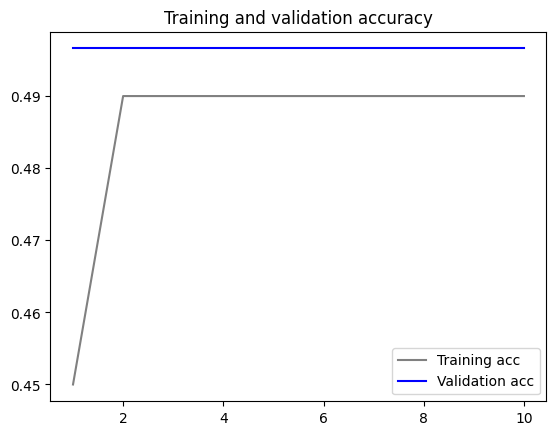

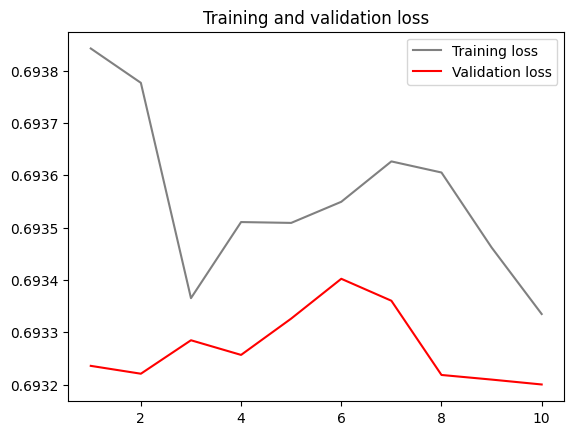

In [33]:
import matplotlib.pyplot as plt

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'grey', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [36]:
try:
    model.load_weights('pre_trained_glove_model.3a')
    print("Model weights loaded successfully.")
except Exception as e:
    print("Error occurred while loading model weights:", e)


Error occurred while loading model weights: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for pre_trained_glove_model.3a


# **Now we change the number of training samples to determine at what point the embedding layer gives better performance**

**Model 4 training sample size - 1000 using embedding layer**

In [37]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:1000]
y_train = y_train[:1000]

In [38]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_4 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 2s 62ms/step - loss: 0.6934 - acc: 0.5075 - val_loss: 0.6945 - val_acc: 0.5050
Epoch 2/10
25/25 [==============================] - 1s 51ms/step - loss: 0.6765 - acc: 0.7575 - val_loss: 0.6939 - val_acc: 0.5100
Epoch 3/10
25/25 [

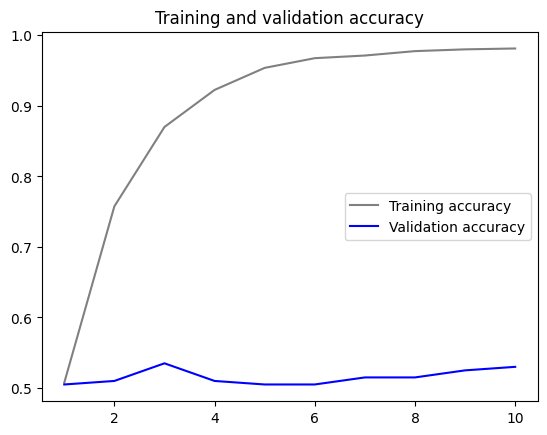

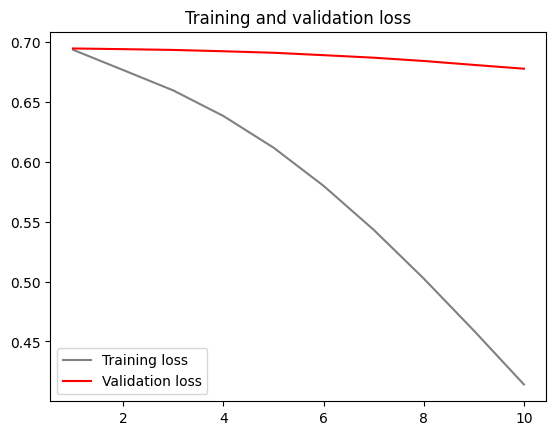

In [39]:
accuracy = history_4.history['acc']
val_accuracy = history_4.history['val_acc']
loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 0.6711 - acc: 0.5906
Test loss: 0.6710591912269592
Test accuracy: 0.5905600190162659


**Model 5 Taining sample - 15000 using both embedding layer and Conv1D**

In [41]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:15000]
y_train = y_train[:15000]

In [42]:
model = Sequential()
model.add(Embedding(10000, 10, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_5 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 10)           100000    
                                                                 
 conv1d (Conv1D)             (None, 148, 512)          15872     
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 512)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 256)           393472    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 256)          

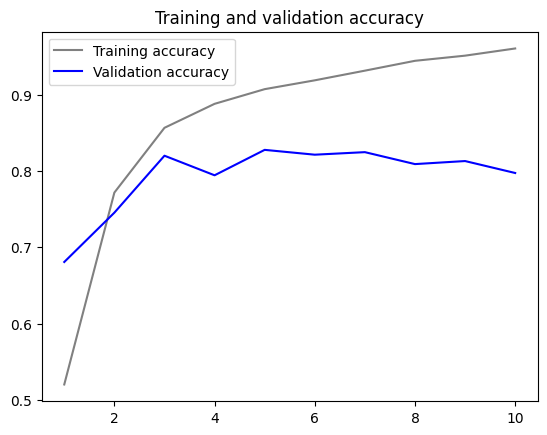

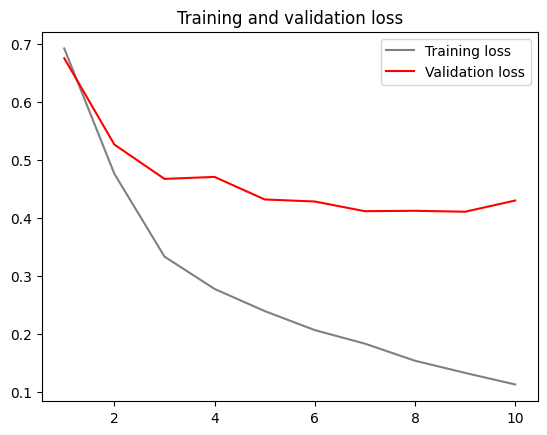

In [43]:
accuracy = history_5.history['acc']
val_accuracy = history_5.history['val_acc']
loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 3s 4ms/step - loss: 0.4450 - acc: 0.7939
Test loss: 0.44504714012145996
Test accuracy: 0.7938799858093262


As we have seen in the previous model even though we increased the training sample size the accuracy was still low but when we used Con1D along with increased training sample size the accuracy improved to 81%

**Model 6 Training sample 30000 using both embedding layers and Conv1D**

In [69]:
max_features=10000
maxlen=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:30000]
y_train = y_train[:30000]

In [70]:
model = Sequential()
model.add(Embedding(10000, 12, input_length=maxlen))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history_6 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 150, 12)           120000    
                                                                 
 conv1d_12 (Conv1D)          (None, 148, 512)          18944     
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 49, 512)           0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 47, 256)           393472    
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 15, 256)           0         
 ng1D)                                                           
                                                                 
 conv1d_14 (Conv1D)          (None, 13, 256)         

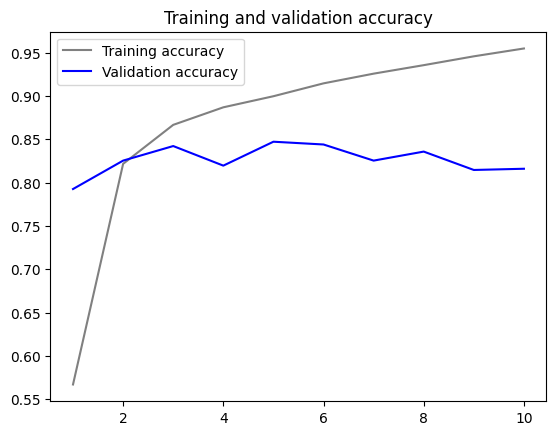

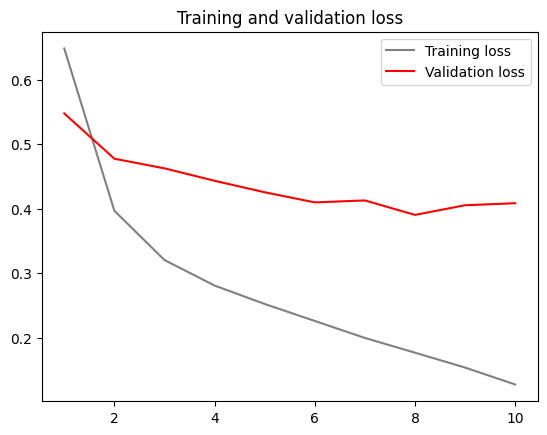

In [71]:
accuracy = history_6.history['acc']
val_accuracy = history_6.history['val_acc']
loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'grey', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'grey', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 3s 4ms/step - loss: 0.4130 - acc: 0.8128
Test loss: 0.41296547651290894
Test accuracy: 0.8127999901771545


**Model 7 pretrained model. Training - 15000 samples**

In [73]:
maxlen = 150  # We will cut reviews after 150 words
training_samples = 15000  # We will be training on 15000 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)

# Convert any non-string elements in the texts list to strings
texts = [str(text) for text in texts]

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where samples are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 9999 unique tokens.
Shape of data tensor: (50000, 150)
Shape of label tensor: (50000, 150)


In [74]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 lstm_3 (LSTM)               (None, 32)                17024     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1017057 (3.88 MB)
Trainable params: 1017057 (3.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [76]:
print("Training data shape:", y_train.shape)

Training data shape: (15000, 150)


In [ ]:
# Compile the Model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',  # Change loss function
              metrics=['acc'])

# Adjust output layer for multiclass classification
model.add(Dense(num_classes, activation='softmax'))  # Replace num_classes with the actual number of classes

# Train the model
history_7 = model.fit(x_train, y_train,
                      epochs=10,
                      batch_size=32,
                      validation_data=(x_val, y_val))

# Save model weights
model.save_weights('pre_trained_glove_model.7a')


In [5]:
import os

# Check if the file exists
weights_file = 'pre_trained_glove_model.7a'
if os.path.exists(weights_file):
    # Load the model weights
    model.load_weights(weights_file)

    # Evaluate the model
    evaluation = model.evaluate(x_test, y_test)
    print("Evaluation Results:", evaluation)
else:
    print("Weights file '{}' not found.".format(weights_file))


Weights file 'pre_trained_glove_model.7a' not found.


In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # We will cut reviews after 150 words
training_samples = 15000  # We will be training on 15000 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

# Define the texts and labels variables
texts = [...]  # Your list of texts goes here
labels = [...]  # Your list of labels goes here

tokenizer = Tokenizer(num_words=max_words)

# Convert any non-string elements in the texts list to strings
texts = [str(text) for text in texts]

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where samples are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 1 unique tokens.
Shape of data tensor: (1, 150)
Shape of label tensor: (1,)


In [33]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # We will cut reviews after 150 words
training_samples = 15000  # We will be training on 15000 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

# Define the texts and labels variables
texts = [...]  # Your list of texts goes here
labels = [...]  # Your list of labels goes here

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)

# Convert any non-string elements in the texts list to strings
texts = [str(text) for text in texts]

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where samples are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 1 unique tokens.
Shape of data tensor: (1, 150)
Shape of label tensor: (1,)


In [35]:
embedding_dim = 100  # Dimensionality of the embedding vectors
embedding_matrix = np.zeros((max_words, embedding_dim))  # Shape should match the embedding layer's weights

# Populate the embedding matrix with pre-trained embedding vectors
# Make sure to replace this with your actual pre-trained embeddings
# Each row i corresponds to the embedding vector for word with index i
# You need to populate embedding_matrix with your actual pre-trained word embeddings

# Example:
# embedding_matrix = load_pretrained_embeddings()

# Set the weights of the embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


In [36]:
print("Training data shape:", y_train.shape)

Training data shape: (1,)


In [52]:
print(y_train[:10])  # Print the first 10 elements of y_train


[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [55]:
import os

# Check if the file exists
weights_file = 'pre_trained_glove_model.8a'
if os.path.exists(weights_file):
    # Load the model weights
    model.load_weights(weights_file)

    # Evaluate the model
    evaluation = model.evaluate(x_test, y_test)
    print("Evaluation Results:", evaluation)
else:
    print("Weights file '{}' not found.".format(weights_file))



Weights file 'pre_trained_glove_model.8a' not found.
